In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ttim

plt.rcParams["figure.figsize"] = (10, 4)

### Example strip area-sink

In [2]:
k = [20.0]
H = 10.0
Saq = [0.1]
L = 100.0
N = 1e-3
z = [0, -H]

In [3]:
ml = ttim.ModelXsection(naq=1, tmin=0.1, tmax=1e3)

left = ttim.XsectionMaq(
    model=ml,
    x1=-np.inf,
    x2=-L / 2,
    kaq=k,
    z=z,
    Saq=Saq,
    topboundary="conf",
    phreatictop=True,
)
rech = ttim.XsectionMaq(
    model=ml,
    x1=-L / 2,
    x2=L / 2,
    kaq=k,
    z=z,
    Saq=Saq,
    topboundary="conf",
    phreatictop=True,
    tsandN=[(0.0, N)],
)
right = ttim.XsectionMaq(
    model=ml,
    x1=L / 2,
    x2=np.inf,
    kaq=k,
    z=z,
    Saq=Saq,
    topboundary="conf",
    phreatictop=True,
)

ml.solve()

self.neq  4
solution complete


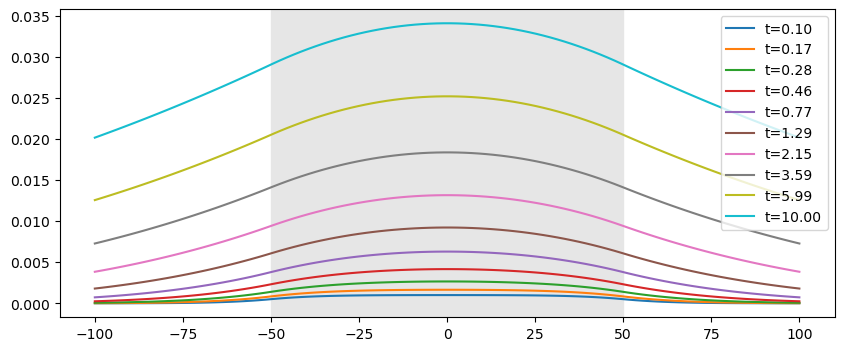

In [4]:
x = np.linspace(-100, 100, 100)
y = np.zeros(100)
plt.axvspan(-50, 50, color=3 * [0.9])
for t in np.logspace(-1, 1, 10):
    h = ml.headalongline(x, y, t)
    plt.plot(x, h[0, 0], label=f"t={t:.2f}")
plt.legend();

In [5]:
# check solution inside
x = 25
y = 0
t = 7
d = 1e-2

# discharge vector
Qxtim, _ = ml.disvec(x, y, t)
Qxnum = rech.T * (ml.head(x - d, y, t) - ml.head(x + d, y, t)) / (2 * d)
print("Qxtim, Qxnum: ", Qxtim, Qxnum)

# deq
d2hdx2 = (
    ml.head(x - d, y, t)
    + ml.head(x + d, y, t)
    + ml.head(x, y - d, t)
    + ml.head(x, y + d, t)
    - 4 * ml.head(x, y, t)
) / d**2
dhdt = (ml.head(x, y, t + d) - ml.head(x, y, t - d)) / (2 * d)
print("lhs: ", d2hdx2)
print("rhs: ", rech.Saq / rech.T * dhdt - N / rech.T)

# check solution outside
x = 75
y = 0
t = 7
d = 1e-2

# discharge vector
Qxtim, _ = ml.disvec(x, y, t)
Qxnum = rech.T * (ml.head(x - d, y, t) - ml.head(x + d, y, t)) / (2 * d)
print("Qxtim, Qxnum: ", Qxtim, Qxnum)

# deq
d2hdx2 = (
    ml.head(x - d, y, t)
    + ml.head(x + d, y, t)
    + ml.head(x, y - d, t)
    + ml.head(x, y + d, t)
    - 4 * ml.head(x, y, t)
) / d**2
dhdt = (ml.head(x, y, t + d) - ml.head(x, y, t - d)) / (2 * d)
print("lhs: ", d2hdx2)
print("rhs: ", rech.Saq / rech.T * dhdt)

Qxtim, Qxnum:  [[0.01914832]] [[0.01914832]]
lhs:  [[-3.83805002e-06]]
rhs:  [[-3.83809051e-06]]
Qxtim, Qxnum:  [[0.03293774]] [[0.03293774]]
lhs:  [[1.06543288e-06]]
rhs:  [[1.06545622e-06]]


### 2 aquifers

In [6]:
k = [10.0, 20.0]
z = [0, -10, -12, -20]
c = [500]
Saq = [0.1, 1e-4]
L = 100.0
N = 1e-3

In [7]:
ml = ttim.ModelXsection(naq=2, tmin=0.1, tmax=1e3)

left = ttim.XsectionMaq(
    model=ml,
    x1=-np.inf,
    x2=-L / 2,
    kaq=k,
    z=z,
    Saq=Saq,
    c=c,
    topboundary="conf",
    phreatictop=True,
)

inf = ttim.XsectionMaq(
    model=ml,
    x1=-L / 2,
    x2=L / 2,
    kaq=k,
    z=z,
    Saq=Saq,
    c=c,
    topboundary="conf",
    phreatictop=True,
    tsandN=[(0.0, N)],
)

right = ttim.XsectionMaq(
    model=ml,
    x1=L / 2,
    x2=np.inf,
    kaq=k,
    z=z,
    Saq=Saq,
    c=c,
    topboundary="conf",
    phreatictop=True,
)

ml.solve()

self.neq  8
solution complete


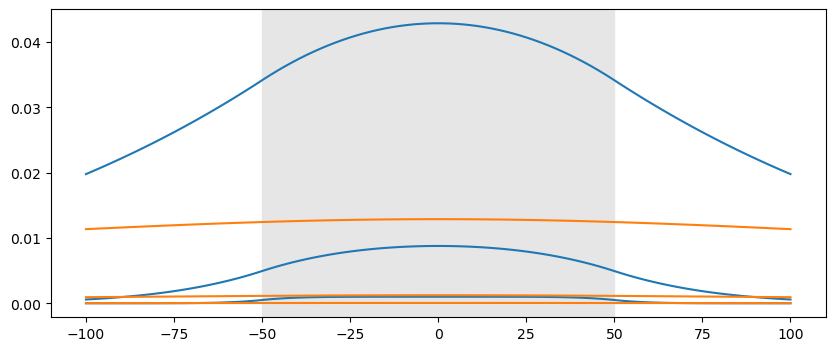

In [8]:
x = np.linspace(-100, 100, 100)
y = np.zeros(100)
plt.axvspan(-50, 50, color=3 * [0.9])
t = np.logspace(-1, 1, 3)
h = ml.headalongline(x, y, t)
for i in range(len(t)):
    plt.plot(x, h[0, i], color="C0")
    plt.plot(x, h[1, i], color="C1")

In [9]:
print("check solution inside")
x = 25
y = 0
t = 0.7
d = 1e-3
dt = 0.001

# discharge vector
Qxtim, _ = ml.disvec(x, y, t)
Qxnum = inf.Tcol * (ml.head(x - d, y, t) - ml.head(x + d, y, t)) / (2 * d)
print("Qxtim: ", Qxtim[:, 0])
print("Qxnum: ", Qxnum[:, 0])

# deq
d2hdx2 = (
    ml.head(x - d, y, t)
    + ml.head(x + d, y, t)
    + ml.head(x, y - d, t)
    + ml.head(x, y + d, t)
    - 4 * ml.head(x, y, t)
) / d**2
dhdt = (ml.head(x, y, t + dt) - ml.head(x, y, t - dt)) / (2 * dt)
h = ml.head(x, y, t)
rhs1 = (
    inf.Saq[0] / inf.T[0] * dhdt[0, 0]
    + (h[0, 0] - h[1, 0]) / (inf.T[0] * inf.c[1])
    - N / inf.T[0]
)
rhs2 = inf.Saq[1] * inf.Haq[1] / inf.T[1] * dhdt[1, 0] - (h[0, 0] - h[1, 0]) / (
    inf.T[1] * inf.c[1]
)
print("lhs: ", d2hdx2[:, 0])
print("rhs: ", rhs1, rhs2)

print("check solution outside")
x = 75
y = 0
t = 0.7
d = 0.01
dt = 0.01

# discharge vector
Qxtim, _ = ml.disvec(x, y, t)
Qxnum = inf.Tcol * (ml.head(x - d, y, t) - ml.head(x + d, y, t)) / (2 * d)
print("Qxtim: ", Qxtim[:, 0])
print("Qxnum: ", Qxnum[:, 0])

# deq
d2hdx2 = (
    ml.head(x - d, y, t)
    + ml.head(x + d, y, t)
    + ml.head(x, y - d, t)
    + ml.head(x, y + d, t)
    - 4 * ml.head(x, y, t)
) / d**2
dhdt = (ml.head(x, y, t + dt) - ml.head(x, y, t - dt)) / (2 * dt)
h = ml.head(x, y, t)
rhs1 = inf.Saq[0] / inf.T[0] * dhdt[0, 0] + (h[0, 0] - h[1, 0]) / (inf.T[0] * inf.c[1])
rhs2 = inf.Saq[1] * inf.Haq[1] / inf.T[1] * dhdt[1, 0] - (h[0, 0] - h[1, 0]) / (
    inf.T[1] * inf.c[1]
)
print("lhs: ", d2hdx2[:, 0])
print("rhs: ", rhs1, rhs2)

check solution inside
Qxtim:  [0.00528708 0.00024616]
Qxnum:  [0.00528708 0.00024616]
lhs:  [-2.72873391e-06 -5.66048944e-08]
rhs:  -2.7292469695794058e-06 -5.660308111144264e-08
check solution outside
Qxtim:  [0.00559443 0.00046795]
Qxnum:  [0.00559443 0.00046795]
lhs:  [2.50199817e-06 1.18889273e-09]
rhs:  2.5019485046389376e-06 1.1887430107100334e-09


## Example river, 1 aquifer

In [10]:
k = [20.0]
z = [11, 10, 0]
Saq = [1e-3]
hstar = 2
L = 100

ml = ttim.ModelXsection(naq=1, tmin=1e-4, tmax=1e3)

left = ttim.XsectionMaq(
    model=ml,
    x1=-np.inf,
    x2=-L / 2,
    kaq=k,
    z=z,
    Saq=Saq,
    c=[100],
    topboundary="semi",
)

riv = ttim.XsectionMaq(
    model=ml,
    x1=-L / 2,
    x2=L / 2,
    kaq=k,
    z=z,
    Saq=Saq,
    c=[100],
    topboundary="semi",
    tsandhstar=[(0.0, hstar), (5, 2 * hstar)],
)

right = ttim.XsectionMaq(
    model=ml,
    x1=L / 2,
    x2=np.inf,
    kaq=k,
    z=z,
    Saq=Saq,
    c=[100],
    topboundary="semi",
)

ml.solve()

self.neq  4
solution complete


In [11]:
lab = np.sqrt(riv.T[0] * riv.c[0])
print(f"leakage factor: {lab} m")

leakage factor: 141.4213562373095 m


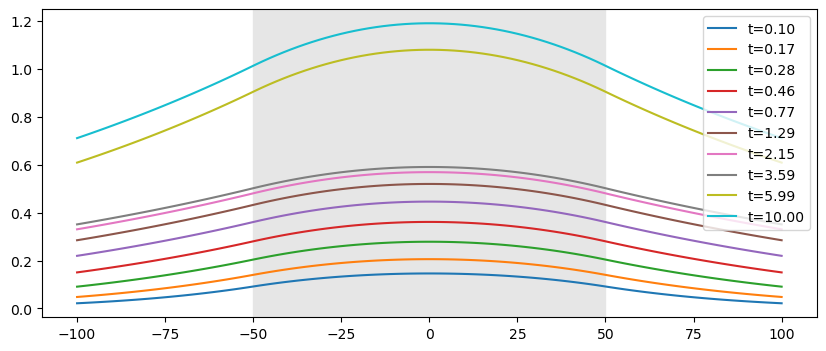

In [12]:
x = np.linspace(-100, 100, 100)
y = np.zeros(100)
plt.axvspan(-50, 50, color=3 * [0.9])
for t in np.logspace(-1, 1, 10):
    h = ml.headalongline(x, y, t)
    plt.plot(x, h[0, 0], label=f"t={t:.2f}")
plt.legend();

In [13]:
# mf6 time step 0.1 day, cell size 10 m
hmf6 = np.loadtxt("./data/mf6_ttim_xsec_riv1.txt")  # load mf6 output to compare

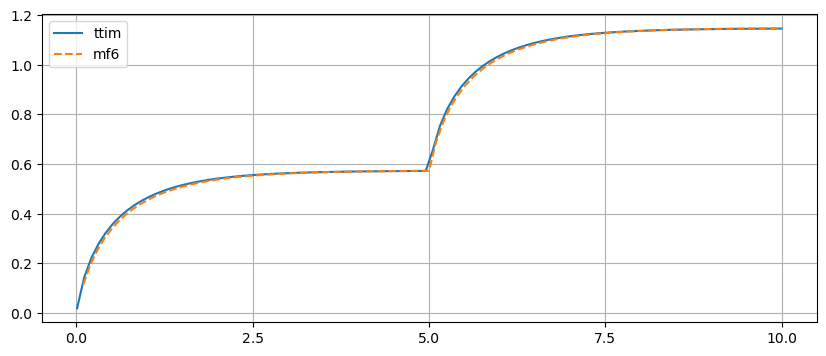

In [14]:
t = np.linspace(0.01, 10, 100)
h = ml.head(25, 0, t)
plt.plot(t, h[0], label="ttim")
plt.plot(hmf6[0], hmf6[1], "--", label="mf6")
plt.xticks(np.linspace(0, 10, 5))
plt.legend()
plt.grid()

In [15]:
# check solution inside
x = 25
y = 0
t = 1
d = 0.01
dt = 1e-3

# discharge vector
Qxtim, _ = ml.disvec(x, y, t)
Qxnum = riv.T * (ml.head(x - d, y, t) - ml.head(x + d, y, t)) / (2 * d)
print("Qxtim, Qxnum: ", Qxtim, Qxnum)

# deq
h = ml.head(x, y, t)
d2hdx2 = (
    ml.head(x - d, y, t)
    + ml.head(x + d, y, t)
    + ml.head(x, y - d, t)
    + ml.head(x, y + d, t)
    - 4 * ml.head(x, y, t)
) / d**2
dhdt = (ml.head(x, y, t + dt) - ml.head(x, y, t - dt)) / (2 * dt)
print("lhs: ", d2hdx2)
print(
    "rhs: ",
    (riv.Saq[0] * riv.Haq[0]) / riv.T * dhdt
    + h / (riv.c[0] * riv.T[0])
    - hstar / (riv.c[0] * riv.T[0]),
)
# print(
#     "rhs: ",
#     (ml.aq.Saq[0] * ml.aq.Haq[0]) / ml.aq.T * dhdt
#     + (h - hstar) / (ml.aq.c[0] * ml.aq.T[0]),
# )  # - hstar / (ml.aq.c[0] * ml.aq.T[0]))

Qxtim, Qxnum:  [[0.34428389]] [[0.34428389]]
lhs:  [[-6.96093494e-05]]
rhs:  [[-6.95979439e-05]]


### Very wide river

self.neq  4
solution complete


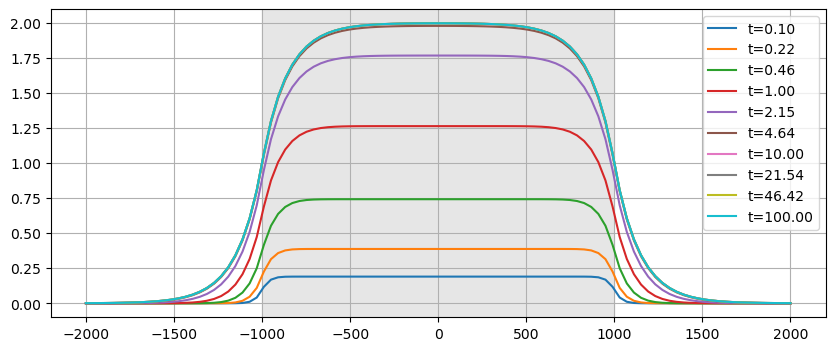

In [16]:
k = [20.0]
z = [11, 10, 0]
c = 100
Saq = [1e-3]
hstar = 2
L = 2000

ml = ttim.ModelXsection(naq=1, tmin=1e-2, tmax=1e3)

left = ttim.XsectionMaq(
    model=ml,
    x1=-np.inf,
    x2=-L / 2,
    kaq=k,
    z=z,
    Saq=Saq,
    c=[100],
    topboundary="semi",
)

riv = ttim.XsectionMaq(
    model=ml,
    x1=-L / 2,
    x2=L / 2,
    kaq=k,
    z=z,
    Saq=Saq,
    c=[100],
    topboundary="semi",
    tsandhstar=[(0.0, hstar)],
)

right = ttim.XsectionMaq(
    model=ml,
    x1=L / 2,
    x2=np.inf,
    kaq=k,
    z=z,
    Saq=Saq,
    c=[100],
    topboundary="semi",
)

ml.solve()

x = np.linspace(-L, L, 100)
y = np.zeros(100)
plt.axvspan(-L / 2, L / 2, color=3 * [0.9])
for t in np.logspace(-1, 2, 10):
    h = ml.headalongline(x, y, t)
    plt.plot(x, h[0, 0], label=f"t={t:.2f}")
plt.legend()
plt.grid()

### Two aquifer 

In [17]:
k = [20.0, 40]
z = [11, 10, 0, -2, -12]
c = 100
Saq = [1e-3, 1e-3]
hstar = 2
L = 100

ml = ttim.ModelXsection(naq=2, tmin=1e-4, tmax=1e3)

left = ttim.XsectionMaq(
    model=ml,
    x1=-np.inf,
    x2=-L / 2,
    kaq=k,
    z=z,
    Saq=Saq,
    c=c,
    topboundary="semi",
)

riv = ttim.XsectionMaq(
    model=ml,
    x1=-L / 2,
    x2=L / 2,
    kaq=k,
    z=z,
    Saq=Saq,
    c=[100],
    topboundary="semi",
    tsandhstar=[(0.0, hstar), (5, 2 * hstar)],
)

right = ttim.XsectionMaq(
    model=ml,
    x1=L / 2,
    x2=np.inf,
    kaq=k,
    z=z,
    Saq=Saq,
    c=[100],
    topboundary="semi",
)

ml.solve()

self.neq  8
solution complete


In [18]:
# check solution inside
x = 25
y = 0
t = 1
d = 0.01
dt = 1e-3

# discharge vector
Qxtim, _ = ml.disvec(x, y, t)
Qxnum = riv.Tcol * (ml.head(x - d, y, t) - ml.head(x + d, y, t)) / (2 * d)
print("Qxtim, Qxnum: ")
print(Qxtim)
print(Qxnum)

# deq
h = ml.head(x, y, t)
d2hdx2 = (
    ml.head(x - d, y, t)
    + ml.head(x + d, y, t)
    + ml.head(x, y - d, t)
    + ml.head(x, y + d, t)
    - 4 * ml.head(x, y, t)
) / d**2
dhdt = (ml.head(x, y, t + dt) - ml.head(x, y, t - dt)) / (2 * dt)
rhs0 = (
    (riv.Saq[0] * riv.Haq[0]) / riv.T[0] * dhdt[0, 0]
    + h[0, 0] / (riv.c[0] * riv.T[0])
    - hstar / (riv.c[0] * riv.T[0])
    + (h[0, 0] - h[1, 0]) / (riv.c[1] * riv.T[0])
)
rhs1 = (riv.Saq[1] * riv.Haq[1]) / riv.T[1] * dhdt[1, 0] + (h[1, 0] - h[0, 0]) / (
    riv.c[1] * riv.T[1]
)
print("lhs: ", d2hdx2[:, 0])
print("rhs: ", rhs0, rhs1)
# print(
#     "rhs: ",
#     (riv.Saq[0] * riv.Haq[0]) / riv.T * dhdt + (h - hstar) / (riv.c[0] * riv.T[0]),
# )  # - hstar / (riv.c[0] * riv.T[0]))

Qxtim, Qxnum: 
[[0.30854703]
 [0.05048272]]
[[0.30854703]
 [0.05048272]]
lhs:  [-6.29571351e-05 -4.76218509e-06]
rhs:  -6.296017641931811e-05 -4.757624397951093e-06


In [19]:
# mf6 time step 0.1 day, cell size 10 m
hmf6 = np.loadtxt("./data/mf6_ttim_xsec_riv2.txt")  # load mf6 output to compare

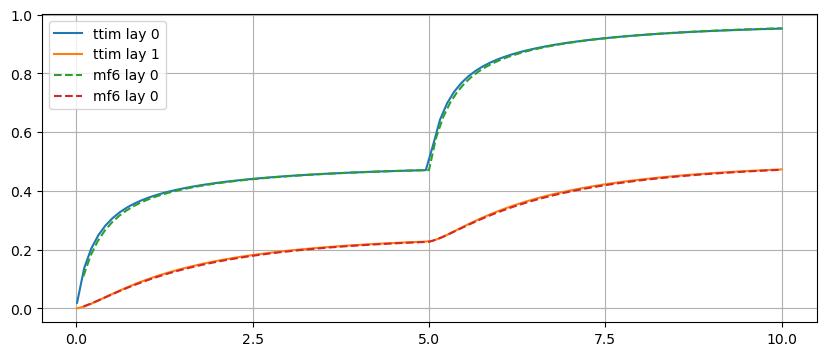

In [20]:
t = np.linspace(0.01, 10, 100)
h = ml.head(25, 0, t)
plt.plot(t, h[0], label="ttim lay 0")
plt.plot(t, h[1], label="ttim lay 1")
plt.plot(hmf6[0], hmf6[1], "--", label="mf6 lay 0")
plt.plot(hmf6[0], hmf6[2], "--", label="mf6 lay 1")
plt.xticks(np.linspace(0, 10, 5))
plt.legend()
plt.grid()